<a href="https://colab.research.google.com/github/choiitea/Choi_DSPN_S24/blob/main/Exercise11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 11: The beauty of kNN

In this exercise, you'll gain practice working with kNN. We'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset, which comes as part of `ggplot2`. This dataset provides information on the quality and price of 50,000 diamonds


## 1. Data, Plotting, and Train/Test Sets (2 pts)
-----
* Load the the `class` and `tidyverse` packages.
* Assign the `diamonds` data set to a simpler name. Then, create a new variable `price_bin` that splits the `price` variable into a binary variable, where 1 indicates that the diamond costs greater than the mean price, and 0 indicates that the diamond costs less than the mean price. Set `price_bin` to be a factor. (*Hint: use the if_else() function*)
* Select just the `carat`, `depth`, `table`, `x`, `y`, and your new `price_bin` variables
* Print the first few lines of the data set
* Print the dimensions of the data set


In [1]:
# INSERT CODE HERE
require(tidyverse)
require(class)

data <- diamonds
head(data)

data <- data %>%
  mutate(price_bin = if_else(price > mean(price), 1, 0))

data$price_bin <- as.factor(data$price_bin)

data_selected <- data %>%
  select(carat, depth, table, x, y, price_bin)

print(head(data_selected))

print(dim(data_selected))

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: class



carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


# A tibble: 6 × 6
  carat depth table     x     y price_bin
  <dbl> <dbl> <dbl> <dbl> <dbl> <fct>    
1  0.23  61.5    55  3.95  3.98 0        
2  0.21  59.8    61  3.89  3.84 0        
3  0.23  56.9    65  4.05  4.07 0        
4  0.29  62.4    58  4.2   4.23 0        
5  0.31  63.3    58  4.34  4.35 0        
6  0.24  62.8    57  3.94  3.96 0        
[1] 53940     6


### Plot
Create a scatterplot of the link between `carat` and `depth`, and use the `color` aesthetics mapping to differentiate between diamonds that cost above versus below the mean price.

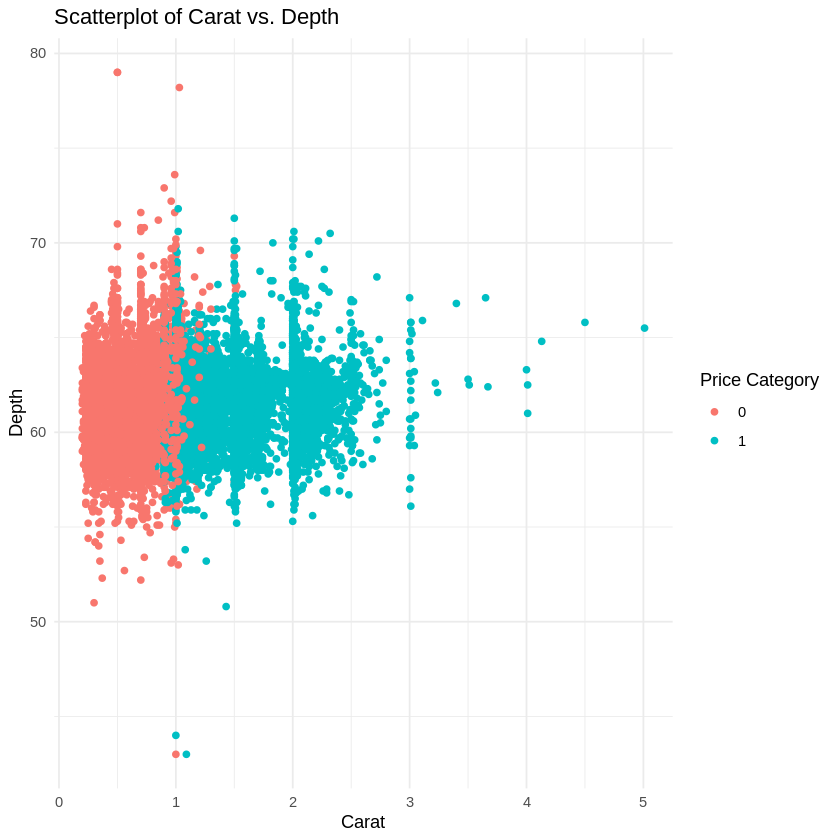

In [2]:
# INSERT CODE HERE
ggplot(data_selected, aes(x = carat, y = depth, color = price_bin)) +
  geom_point() +
  labs(title = "Scatterplot of Carat vs. Depth",
       x = "Carat",
       y = "Depth",
       color = "Price Category") +
  theme_minimal()

Based on the above scatterplot, how do you think kNN will perform using only these two variables to predict diabetes diagnosis? Which variable, carat or depth, gives us the most information about which price class the diamond will belong to?
> Diabetes diagnosis? It will perform very poorly... because carats and depth has nothing to do with diabetes - I'm confused, is this a typo...? With respect to price class the diamond belongs to, the carat of the diamond seems to provide us with the most information - we see a clear divide in price category by carat. When the carat is greater 1 (roughly), it belongs in price cateogry 1.
>
>


### Test vs Train

Before we run KNN on these data, we need to set aside a portion of the observations as our test set. Below, randomly divide the data such that 30% are allotted to the `test` set and the rest are allotted to the `train` set. Print the first few lines of each set, and print the dimensions of each set to double check your division of the data.

In [3]:
set.seed(2023)

# INSERT CODE HERE
nrow(data_selected) * .3
#pull random sample of 30% row indices which are 16182
test.inds <- sample(1:nrow(data_selected),16182)

# TRUE/FALSE indicator for whether each observation is a test item or not.
data_selected$is.test <- 1:nrow(data_selected) %in% test.inds
head(data_selected)


[1] 16182

carat,depth,table,x,y,price_bin,is.test
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
0.23,61.5,55,3.95,3.98,0,FALSE
0.21,59.8,61,3.89,3.84,0,TRUE
0.23,56.9,65,4.05,4.07,0,FALSE
0.29,62.4,58,4.20,4.23,0,FALSE
0.31,63.3,58,4.34,4.35,0,FALSE
0.24,62.8,57,3.94,3.96,0,FALSE


## 2: KNN (3 points)
----
Now, use the `knn()` function from the `class` library to predict `price_bin` from the `carat` and `depth`. Set `k = 3`.

*Hint: Review the format required for the arguments of knn()*

In [4]:
set.seed(2023)
# INSERT CODE HERE

library(class)
# training data pulls the "not test" rows
train.preds <- cbind(data_selected$depth[-test.inds], data_selected$carat[-test.inds])
train.price_bin <- data_selected$price_bin[-test.inds]

# testing data pulls the test rows
test.preds <- cbind(data_selected$depth[test.inds], data_selected$carat[test.inds])

# run kNN
test.price_bin.knn <- knn(train.preds, test.preds, train.price_bin, k = 3)

# print first 10 test price_bin predictions
test.price_bin.knn[1:10]


[1] 1 1 1 0 0 1 1 0 0 0
Levels: 0 1

Now, output a confusion matrix and calculate the test error to evaluate model performance.

In [5]:
# INSERT CODE HERE
# new variable for each observation's predicted price bin.
data_selected$price_bin_pred <- data_selected$price_bin

# add the KNN predictions for test obs to dataset.
data_selected$price_bin_pred[test.inds] <- test.price_bin.knn

# in which cases does the observed Species equal the predicted?
data_selected$KNN_correct <- data_selected$price_bin == data_selected$price_bin_pred

confusion_df <- data.frame(predicted = test.price_bin.knn,actual = data_selected$price_bin[test.inds])
table(confusion_df)
print("---")
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))

         actual
predicted    0    1
        0 9707  316
        1  539 5620

[1] "---"
[1] "Accuracy: 0.947163515016685"


How did your model perform?
> * Write your response here
>
> * Performed with very high accuracy of 94.7%. From the confusion matrix, there doesn't seem to be any particular bias towards one response, meaning that the model is correctly classifying both price bins.


Let's try to improve our model by adding all of the other variables in our data set as predictors. Rerun your `knn()` below, keeping `k = 3`. Again, output a confusion matrix and error rate for your updated model fit.

In [6]:
set.seed(2023)
# INSERT CODE HERE
# carat, depth, table, x, y are the variables.
# training data pulls the "not test" rows
train.preds <- cbind(data_selected$depth[-test.inds], data_selected$carat[-test.inds], data_selected$table[-test.inds], data_selected$x[-test.inds], data_selected$y[-test.inds])
train.price_bin <- data_selected$price_bin[-test.inds]

# testing data pulls the test rows
test.preds <- cbind(data_selected$depth[test.inds], data_selected$carat[test.inds], data_selected$table[test.inds], data_selected$x[test.inds], data_selected$y[test.inds])

# run kNN
test.price_bin.knn <- knn(train.preds, test.preds, train.price_bin, k = 3)

# new variable for each observation's predicted price bin.
data_selected$price_bin_pred <- data_selected$price_bin

# add the KNN predictions for test obs to dataset.
data_selected$price_bin_pred[test.inds] <- test.price_bin.knn

# in which cases does the observed Species equal the predicted?
data_selected$KNN_correct <- data_selected$price_bin == data_selected$price_bin_pred

confusion_df <- data.frame(predicted = test.price_bin.knn, actual = data_selected$price_bin[test.inds])
table(confusion_df)
print("---")
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))

         actual
predicted    0    1
        0 9728  391
        1  518 5545

[1] "---"
[1] "Accuracy: 0.943826473859844"


Did your model predictions improve?
> * Write your response here
>
> * No the model predictions didn't improve - it actually fell by a small amount (about .3%)


# 3: for loop (3 points)
----

So adding additional predictors didn't shift our error much. Let's see if adjusting `k` has a larger impact on model accuracy.

Using your initial model above with just `carat` and `depth`, run a `for loop` that runs the same model 30 times, for `k = 1:30`.

Output a data frame that has `k` and the overall `error` as columns.

The structure of the output data frame and `for loop` are provided for you below. Note that your loop will take a minute or two to run because there are so many observations in the dataset. It may be helpful while you are writing and testing your loop to run it on a subset of the data with only a handful of rows.

In [7]:
# this is provided
# setting up empty table to store for loop output
output  <- data.frame(k = seq(1:30),
                     error = rep(NA, 30))
head(output)

,k,error
,<int>,<lgl>
1,1,NA
2,2,NA
3,3,NA
4,4,NA
5,5,NA
6,6,NA


In [9]:
# training data pulls the "not test" rows
train.preds <- cbind(data_selected$depth[-test.inds], data_selected$carat[-test.inds])
train.price_bin <- data_selected$price_bin[-test.inds]

# testing data pulls the test rows
test.preds <- cbind(data_selected$depth[test.inds], data_selected$carat[test.inds])

for (k in seq(1:30)) {
    knn_fits  <- knn(train.preds, test.preds, train.price_bin, k = k) # your knn function here

    #overall error
    conf_df  <- table(predicted = knn_fits, actual = data_selected$price_bin[test.inds]) # data frame of test predictions versus actual test
    output$error[k] <- 1 - mean(knn_fits == data_selected$price_bin[test.inds])

}
head(output)

,k,error
,<int>,<dbl>
1,1,0.05314547
2,2,0.05363985
3,3,0.05382524
4,4,0.05258930
5,5,0.05246570
6,6,0.05240391


*Create* a line plot of your `output` object using `ggplot`. Add a (non-linear) `geom_smooth` layer.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


,k,error
,<int>,<dbl>
17,17,0.0504264


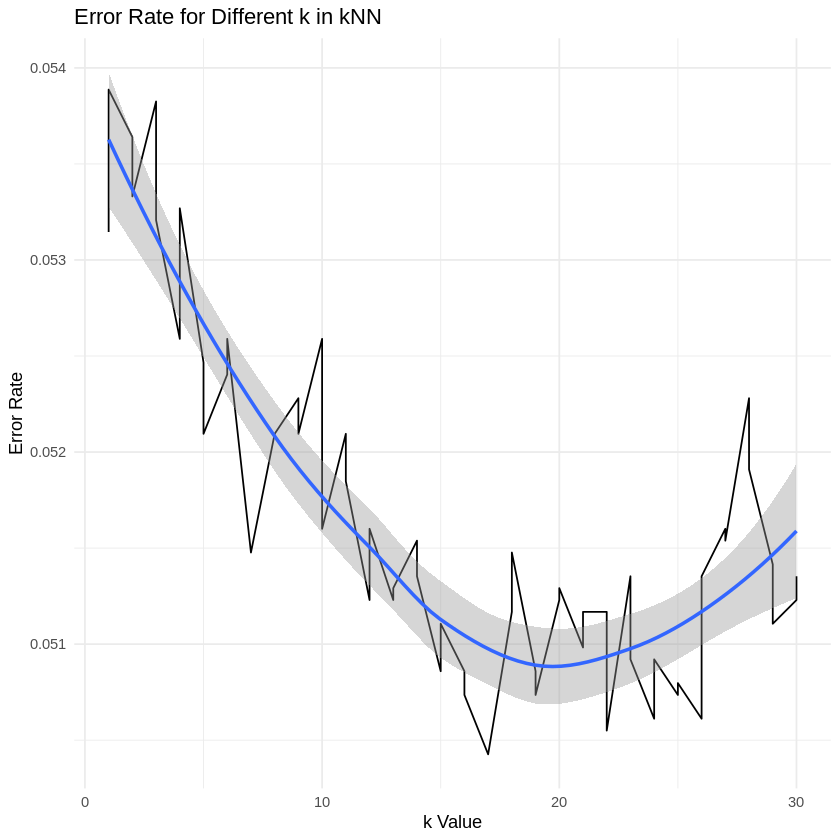

In [10]:
# INSERT CODE HERE
ggplot(output, aes(x = k, y = error)) +
  geom_line() + # line plot specified
  geom_smooth() +  # Add a non-linear smooth line
  labs(title = "Error Rate for Different k in kNN",
       x = "k Value",
       y = "Error Rate") +
  theme_minimal()

output[which.min(output$error), ]

Interpret your plot. What would you select as the best value of `k`? How much does this improve your test error?
> * *Write your response here*
>
> * As k increases, the error rate decreases. But there is a visible minima in the error rate curve, suggesting a point of optimal balance between bias and variance. After reaching the minima, the error rate starts to increase again slightly as k grows further. The best value of k appears to be roughly between 16 and 20 - visually, I'm going with 19. The imporvement in test error is low, around 0.003.


# 4: Standardizing predictors (2)
-----

Because knn is based on distances between points, it is very sensitive to the scale of your variables. Looking at our predictor variables, we can see that `carat` and `depth` are orders of magnitude different in terms of scales. Maybe we can improve our fit even more by addressing this!

Below, use the `scale()` function to standardize your predictors. (Note that you don't need to standardize `price_bin`.)

Then, run your model a final time with your standardized predictors (just `carat` and `depth` still). Set `k` to the optimal value you determined in your plot above. Output the confusion matrix and error rate again.

In [13]:
set.seed(2023)
#INSERT CODE HERE

# standardize the predictors in the training and testing sets
train.preds.scaled <- scale(train.preds)
test.preds.scaled <- scale(test.preds)

# kNN on the standardized predictors
test.price_bin.knn.scaled <- knn(train.preds.scaled, test.preds.scaled, train.price_bin, k = 19)

# create a confusion matrix from the predictions and the actual test set values
conf_matrix_scaled <- table(predicted = test.price_bin.knn.scaled, actual = train.price_bin[test.inds])

print(conf_matrix_scaled)

# calculate the error from the confusion matrix
error_rate_scaled <- 1 - mean(test.price_bin.knn.scaled  == data_selected$price_bin[test.inds])

print(error_rate_scaled)
mean(test.price_bin.knn.scaled  == data_selected$price_bin[test.inds])

         actual
predicted    0    1
        0 4363  857
        1 2827 3300
[1] 0.05054999


[1] 0.94945

What impact did rescaling the data have on your error rate?
> * *Write response here*
>
> * scaling the data reduced the error rate slightly. but... there appears to be more incorrect predictions with the scaled data too.


**DUE:** 5pm March 20, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*
>
>
